In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv('_customer.csv')

data

,Income,Spending_Score
0,68,52
1,80,75
2,22,15
3,45,60
4,0,10
...,...,...
101,42,28
102,60,62
103,75,75
104,35,18


   Income  Spending_Score
0      68              52
1      80              75
2      22              15
3      45              60
4       0              10


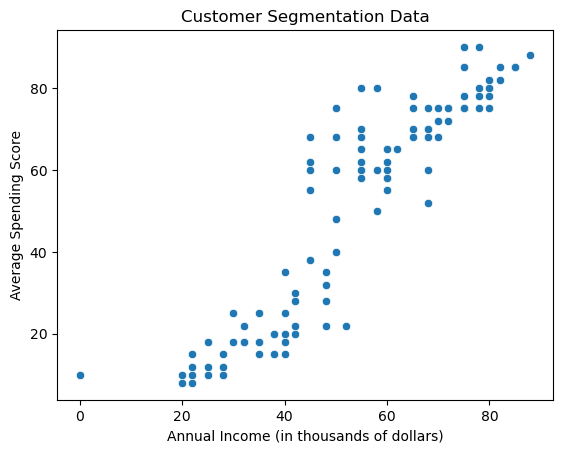

In [2]:
#explore and visualize the data
print(data.head())
sns.scatterplot(x='Income', y='Spending_Score', data=data)
plt.title('Customer Segmentation Data')
plt.xlabel('Annual Income (in thousands of dollars)')
plt.ylabel('Average Spending Score')
plt.show()


In [3]:

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Income', 'Spending_Score']])
scaled_data

array([[ 0.73006252,  0.03482735],
       [ 1.35583039,  0.90124649],
       [-1.66871432, -1.35897735],
       [-0.4693259 ,  0.33619053],
       [-2.81595542, -1.54732934],
       [ 1.09509377,  1.46630245],
       [-0.99079913, -0.98227338],
       [-0.20858929,  0.33619053],
       [ 0.57362055,  0.7128945 ],
       [-1.77300897, -1.54732934],
       [ 0.05214732,  1.08959847],
       [-0.31288394, -1.09528457],
       [ 1.35583039,  1.08959847],
       [-1.51227236, -1.24596616],
       [ 0.31288394,  0.52454251],
       [ 0.83435716,  0.90124649],
       [-0.83435716, -1.17062537],
       [-0.20858929,  0.90124649],
       [ 1.25153574,  1.46630245],
       [-0.73006252, -0.60556941],
       [ 0.05214732,  0.52454251],
       [-1.35583039, -1.35897735],
       [ 1.09509377,  1.27795046],
       [-0.62576787, -0.79392139],
       [ 0.20858929,  1.08959847],
       [ 0.83435716,  0.63755371],
       [-1.1472411 , -1.24596616],
       [ 0.57362055,  1.01425768],
       [-0.10429465,

In [4]:

num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)



C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


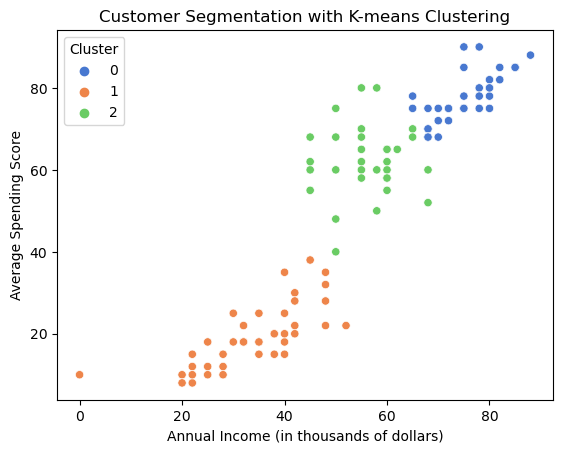

In [5]:

# visualize the clusters
sns.scatterplot(x='Income', y='Spending_Score', hue='Cluster', data=data, palette='muted', legend='full')
plt.title('Customer Segmentation with K-means Clustering')
plt.xlabel('Annual Income (in thousands of dollars)')
plt.ylabel('Average Spending Score')
#plt.legend(loc=2, fontsize='small', fancybox=True)
plt.show()


In [6]:
#interpret the results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('\nCluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Income', 'Spending_Score']))


Cluster Centers:
      Income  Spending_Score
0  75.228571       77.571429
1  33.850000       19.300000
2  56.032258       62.161290
